# Regresión lineal - manual:

**Explicación R. Lineal ->** https://www.notion.so/Regresi-n-lineal-39b5e113aa01468a8963932b5ec26123

**Librerías, Funciones:**
- *Pandas* -> DataFrame
- *Python* -> tolist(), type(), len(), sum()
- *Numpy* -> random.randn, mean, sqrt
- *Matplotlib.pyplot* -> .plot, .title


**Índice:**

0. Preparación previa
1. Representación **gráfica**
2. Elaboración del **modelo**
3. Cálculo de **errores:**
- SSD, SSR, SST
- R2
- RSE

# 0. Preparación previa

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creamos una tabla aleatoria para usar de ejemplo:
- **LM:**   y = a + b * x
- **Distrib. de X:**   100 valores distribuídos según una N(1.5,2.5)
- **LM:**   Y_predicción = 5 + 1.9 * x + e
- **Distrib. del error:**   distribuído según una N(0, 0.8)

In [83]:
x = 1.5 + 2.5 * np.random.randn(100)
y_pre = 5 + 1.9 * x

e = 0 + 0.8 + np.random.randn(100)
y_act = 5 + 1.9 * x + e

type(x),type(y_pre),type(y_act)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [84]:
#Pasamos de Array a formato lista:

x_list = x.tolist()
y_act_list = y_act.tolist()
y_pre_list = y_pre.tolist()

type(x_list),type(y_pre_list),type(y_act_list)

(list, list, list)

In [85]:
#Construimos un DataFrame con las listas creadas:

df = pd.DataFrame(
    {
        "X": x_list,
        "Y Actual": y_act_list,
        "Y Predicción": y_pre_list
    }
)

df.head(3)

,X,Y Actual,Y Predicción
0,0.708496,5.821262,6.346143
1,0.457188,7.290266,5.868657
2,2.439371,8.390081,9.634804


# 1. Representación gráfica

Podemos observar cómo los valores Actuales son similares a los Predichos:

In [86]:
#Creamos una columna con el valor de Y promedio, **para cada valor de X**, para así poder representarla:

y_mean = [np.mean(y_act) for i in range (1, len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual vs Predicción')

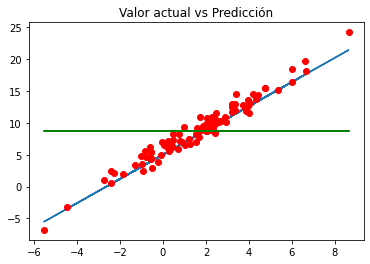

In [87]:
%matplotlib inline

plt.plot(x,y_pre) #Predicción
plt.plot(x,y_act,"ro") #Actuales
plt.plot(x,y_mean,"g")
plt.title("Valor actual vs Predicción")

# 3. Elaboración del modelo

Obtenemos los estimadores Alpha y Beta para elaborar el modelo lineal:
- **beta** = sum((xi - x_mean) * (yi - y_mean)) / sum((xi - x_mean)^2) 
- **alpha** = (y_mean - b * x_mean)

In [90]:
x_m  = np.mean(df["X"])
y_m  = np.mean(df["Y Actual"])
x_m, y_m

(1.6193199407028178, 8.791816490259663)

In [91]:
beta = sum((df["X"] - x_m) * (df["Y Actual"] - y_m)) / sum((df["X"] - x_m)**2) 
alpha = y_m - beta * x_m

alpha, beta

(5.643604955484872, 1.9441565904563631)

**El modelo lineal obtenido por regresión es:**

- y = 5.941563579796163 + 1.8858224961040246 * x

In [92]:
df["Y Model"] = alpha + beta * df["X"] 
df.head(3)

,X,Y Actual,Y Predicción,Y Model
0,0.708496,5.821262,6.346143,7.021032
1,0.457188,7.290266,5.868657,6.532450
2,2.439371,8.390081,9.634804,10.386124


# 2. Cálculo de errores
### 2.1. SSR, SSD & SST:

In [95]:
SSR = sum((df["Y Predicción"] - np.mean(y_act))**2)
SSD = sum((df["Y Predicción"] - df["Y Actual"])**2)
SST = sum((df["Y Actual"] - np.mean(y_act))**2)

SSR, SSD, SST

(2008.0655171654762, 139.14432233274013, 2135.8929825364744)

### 2.2. R2:

In [96]:
R2 = SSR/SST
R2 #Modelo muy bueno, predicción muy acertada (1)

0.9401526825472327

### 2.3. Error estándar de los residuos (RSE):

El error es de 1,19 sobre una media de 8,79. Relativamente pequeño.

Existe un 13,5% de error en el modelo.

In [98]:
RSE = np.sqrt(SSD/(len(df)-2))
mean = np.mean(df["Y Actual"])

RSE, mean

(1.1915704023696925, 8.791816490259663)

In [101]:
error = (RSE / np.mean(df["Y Actual"])) * 100 
error

13.553176453237139